#  Лабораторная работа №2 «ДВПФ и ДПФ»
Радиофизическая лаборатория 2020-2021 уч. год., понедельник 17:05–20:00
Группы Б01-818, С01-819 ФРКТ МФТИ


In [ ]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
from scipy.linalg import dft

In [ ]:
# Если используете Jupyter, то можно поменять backend
%matplotlib notebook


In [ ]:
%matplotlib inline

# Занятие 1. Основные свойства ДВПФ
Далее значения $N$, $L$, ${{\nu }_{0}}$ следует использовать из таблицы в соответствии с Вашим вариантом задания.

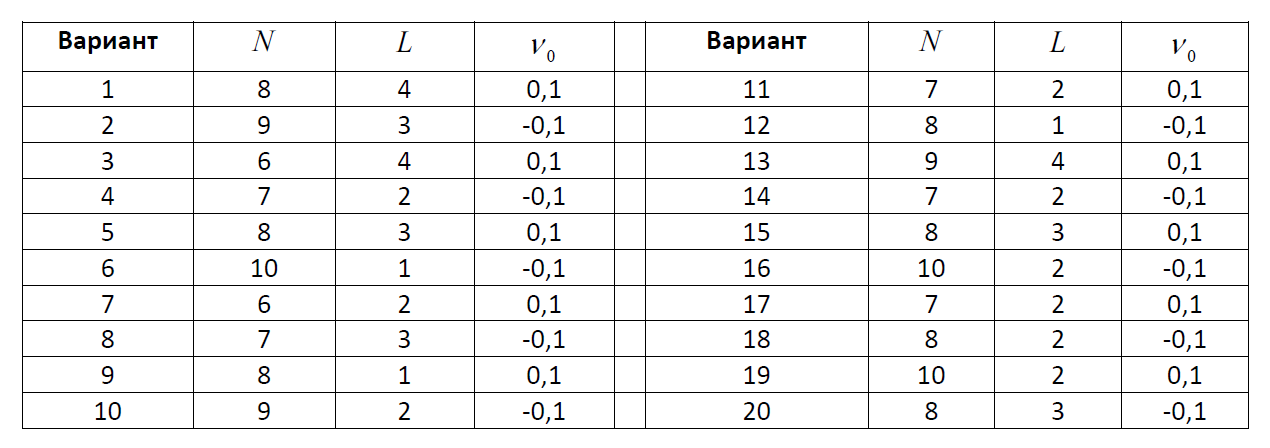

## Задача 1.1.  Прямоугольный импульс в дискретной форме.  

С помощью моделирования  вычислите и постройте график для модуля и фазы ДВПФ  $X_N(\nu)$  последовательности из $N$ последовательных единичных импульсов ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ для $\nu \in [-0,5; \;0,5]$.  Сравните результат с аналитической записью для  $X_N(\nu)$ (задача 1.б из задания к допуску).  Заполнить таблицу, используя результаты моделирования и аналитические записи. Принять частоту дискретизации равной 1 Гц. 

In [ ]:
# initialization
N = 9
L = 3
nu0 = -0.1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


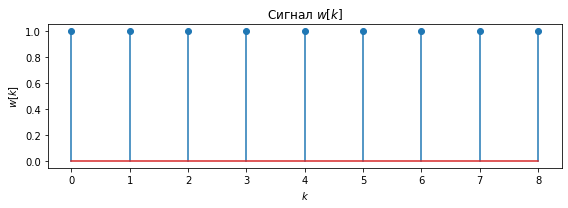

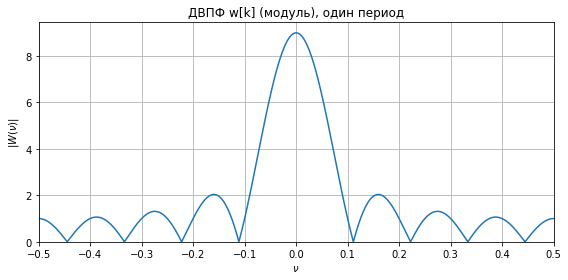

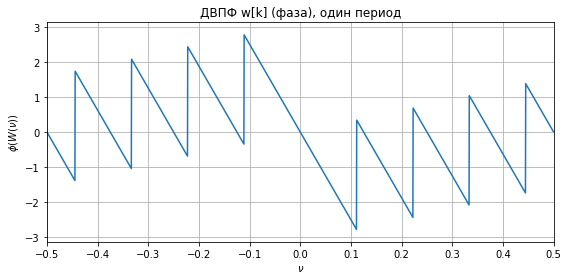

In [ ]:
# дискретный сигнал
w=np.ones(N)
k = np.arange(len(w))

plt.figure(figsize=[8, 3])
plt.stem(k, w)
plt.title('Сигнал $w[k]$')
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.tight_layout()

# ДВПФ
def dtft(x, M=2048):
    return  np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

# Модуль ДВПФ
plt.figure(figsize=[8, 4])
nu, W = dtft(w, M=2048)
plt.plot(nu, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

# Фаза ДВПФ
plt.figure(figsize=[8, 4])
plt.plot(nu, np.angle(W))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('ДВПФ w[k] (фаза), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$\phi (W(\\nu))$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

In [ ]:
#val_Max = max(abs(W[np.logical_and(nu > -0.1, nu < 0.1)]))
#val_Min = min(abs(W[np.logical_and(nu > 0.05, nu < 0.15)]))
#val_max = max(abs(W[np.logical_and(nu > -0.1, nu < 0.1)]))
#nu[np.argmax( abs(W[np.logical_and(nu < 0.1, nu > -0.1)]) )]
#nu[np.argmax( abs(W[nu < -0.1]))]
#print(val_Max)
#print(val_Min*2)
#print(np.argmax(abs(W[np.logical_and(nu > -0.1, nu < 0.1)])))

def arg_arr(nu, M=2048):
  return int(M*(nu+0.5))

def f(x):
  return abs(W[arg_arr(x)])

def minmax(f, x1 = -1000, x2 = 1000, min = 1000, max = -1000, dx = 0.001):
  x_min = x1
  x_max = x2
  for x in np.arange(x1, x2, dx):
    if f(x) < min:
      min = f(x)
      x_min = x
    if f(x) > max:
      max = f(x)
      x_max = x
  print("x_min = ", x_min)
  print("min = ", min)
  print("x_max = ", x_max)
  print("max = ", max, "\n\n")
  return x_min, min, x_max, max


minmax(f, 0, 0.15)

def argf(x):
  return np.angle(W[arg_arr(x)])

minmax(argf, 0, 0.15)

import scipy.integrate as integrate
integrate.quad(lambda x: f(x)**2, -0.5, 0.5, limit=10000)

x_min =  0.111
min =  0.022477717219243264
x_max =  0.0
max =  9.0 


x_min =  0.111
min =  -2.7857091108003535
x_max =  0.112
max =  0.33133985018329726 




(9.000000001270404, 9.931355247672573e-08)

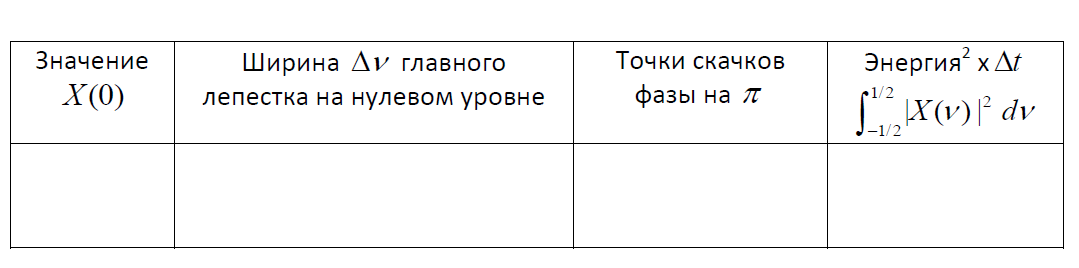

$$X(0) = 9$$
$$\Delta \nu = 0.22$$
$$(\nu_1, \nu_2) = (0.111, 0.112)$$
$$\text{Energy} = 9$$

$^2$ Для дискретного сигнала рассматривают энергию, приходящуюся на один период частоты, т.е. на полосу частот шириной ${{f}_{\text{д}}}$:

$\int_{-0,5{{f}_{\text{д}}}}^{0,5{{f}_{\text{д}}}}{|}X(f){{|}^{2}}df=\frac{1}{\Delta t}\int_{-1/2}^{1/2}{|}X(\nu ){{|}^{2}}d\nu $
Для ее вычисления можно воспользоваться равенством Парсеваля для ДВПФ. 


## Задача 1.2.  Свойство масштабирования. 

Постройте последовательность ${{x}_{L}}[k]=\sum\limits_{m=-\infty }^{\infty }{{{x}_{N}}}[m]\mathbf{1}[k-mL]$, добавив $L-1$ нулевой отсчет между каждой парой соседних отсчетов сигнала ${{x}_{N}}[k]$ (из задачи 1.1). С помощью моделирования постройте модуль ее ДВПФ для $\nu \in [-0,5; \;0,5]$ и сравните результат с ${{X}_{N}}(\nu L)$ (из задачи 1.1).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


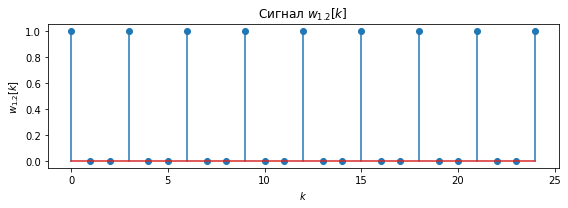

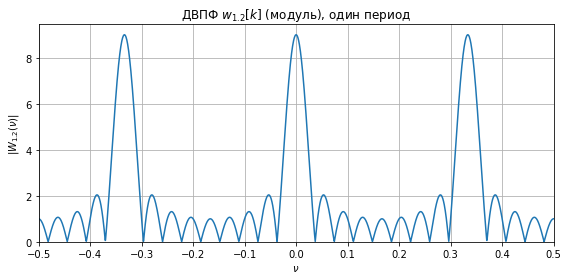

In [ ]:
# дискретный сигнал
w2 = np.zeros(N+(L-1)*(N-1))
k2 = np.arange(len(w2))
for i in k2:
  if i%(L) == 0:
    w2[i] = 1.


plt.figure(figsize=[8, 3])
plt.stem(k2, w2)
plt.title('Сигнал $w_{1.2}[k]$')
plt.xlabel('$k$')
plt.ylabel('$w_{1.2}[k]$')
plt.tight_layout()

# Модуль ДВПФ
plt.figure(figsize=[8, 4])
nu2, W2 = dtft(w2, M=2048)
plt.plot(nu2, abs(W2))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ $w_{1.2}[k]$ (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W_{1.2}(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

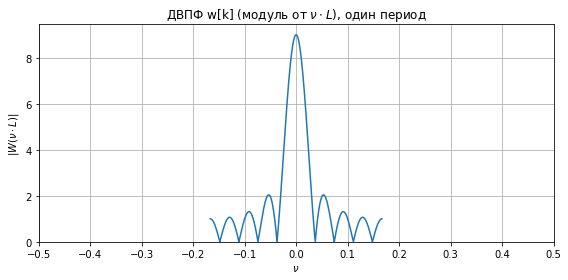

In [ ]:
# Модуль ДВПФ
plt.figure(figsize=[8, 4])
plt.plot(nu/L, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль от $\\nu \cdot L$), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu\cdot L)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

## Задача 1.3.  Дифференцирование спектральной плотности.
Рассмотрите последовательность ${{x}_{D}}[k]=k\,{{x}_{N}}[k]$.  Постройте с помощью моделирования график для модуля ДВПФ этой последовательности ${{X}_{D}}(\nu )$ для $\nu \in [-0,5; \;0,5]$. 

** Получить численным или символьным дифференцированием график для $\frac{j}{2\pi }\frac{d{{X}_{N}}(\nu )}{d\nu }$ и сравнить его с ${{X}_{D}}(\nu ).$ 


$\frac{j}{2\pi}\frac{dX_N(\nu)}{d\nu} = \frac{j}{2\pi}\frac{d}{d\nu}(\sum_{k=0}^{N-1}exp(-2\pi j\nu k)) = \sum_{k=0}^{N-1}k\cdot exp(-2\pi j\nu k)$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


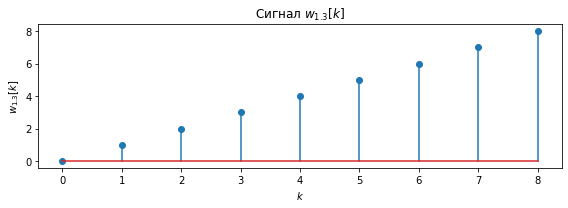

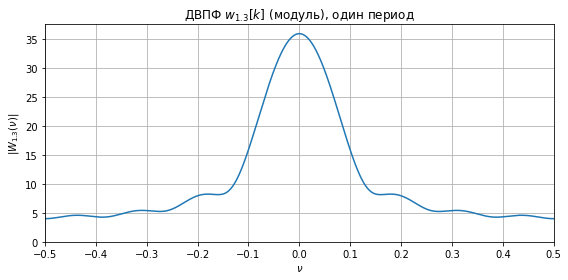

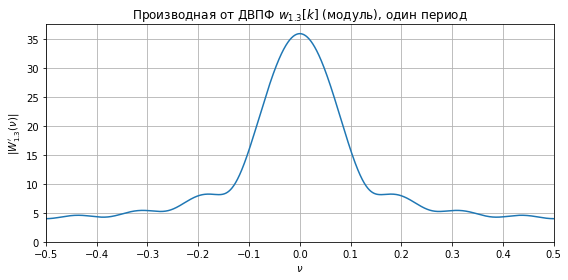

In [ ]:
# дискретный сигнал
w3 = np.ones(N)
k3 = np.arange(len(w3))
for k in k3:
  w3[k] = k*w3[k]




plt.figure(figsize=[8, 3])
plt.stem(k3, w3)
plt.title('Сигнал $w_{1.3}[k]$')
plt.xlabel('$k$')
plt.ylabel('$w_{1.3}[k]$')
plt.tight_layout()


# Модуль ДВПФ
plt.figure(figsize=[8, 4])
nu3, W3 = dtft(w3, M=2048)
plt.plot(nu3, abs(W3))


plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ $w_{1.3}[k]$ (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W_{1.3}(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

def theor_f(nu, N):
  result = 0.
  for k in range(N):
    result = result + k * np.exp(-2*np.pi*1j*nu*k)
  return(np.abs(result))

plt.figure(figsize=[8, 4])
theor_arr = theor_f(nu3, N)
plt.plot(nu3, theor_arr)

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('Производная от ДВПФ $w_{1.3}[k]$ (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W_{1.3}\'(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

## Задача 1.4. Теорема смещения.
С помощью моделирования получите график модуля спектральной плотности ${{X}_{S}}(\nu )$ для сигнала ${{x}_{S}}[k]={{x}_{N}}[k]\exp (j2\pi {{\nu }_{0}}k)$. Приведите ответы на следующие вопросы.

а) Какую аналитическую форму записи имеет функция ${{X}_{S}}(\nu )$?

> 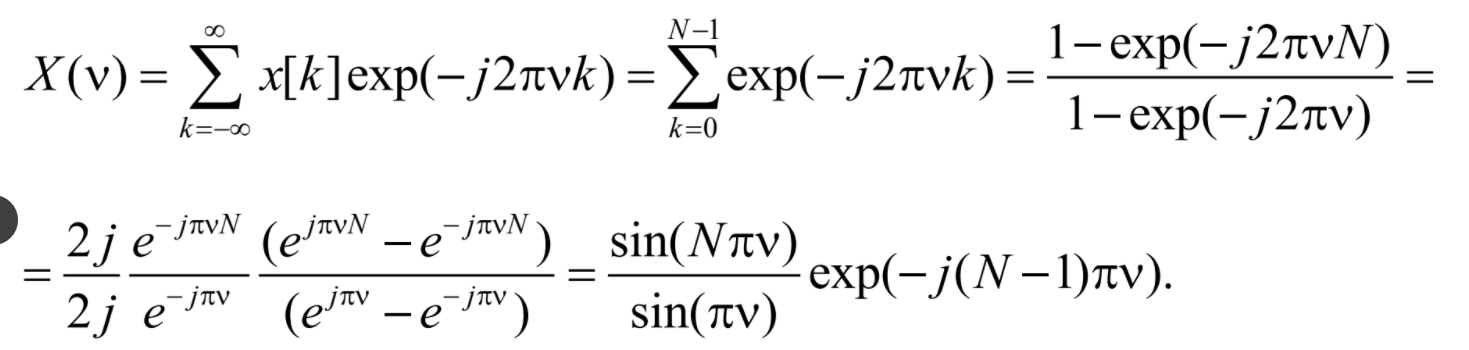
> 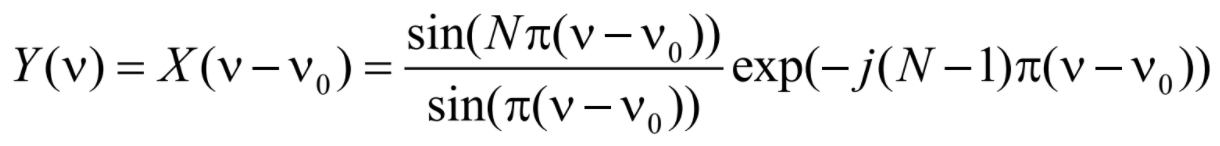

б) Как результат моделирования соотносится с теоремой смещения для ДВПФ?
> Эксперимент подтверждает теорию.
> 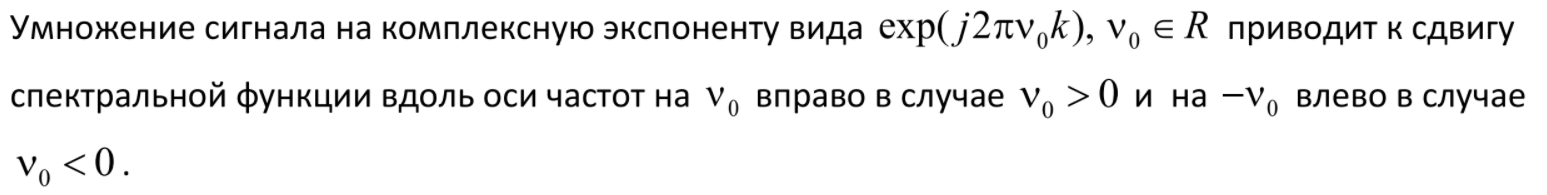 

в) Почему получившийся спектр не симметричен относительно нулевой частоты?
> Потому что изначальный спектр $X(\nu)$ был симметричен относительно нуля, а после преобразования мы его сместили, получив $Y(\nu)$.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


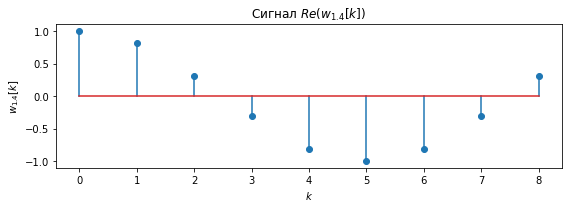

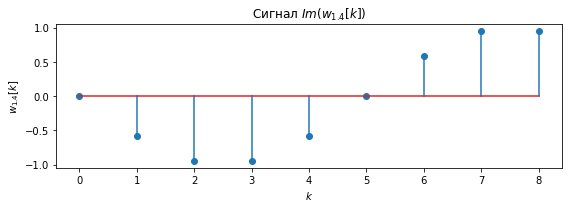

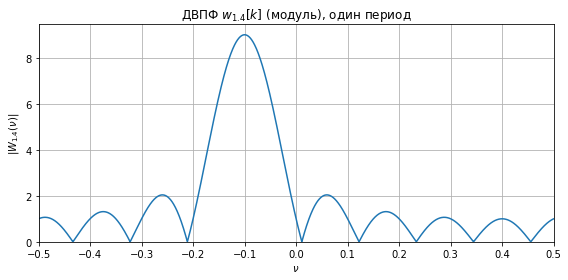

In [ ]:
# дискретный сигнал
k4 = np.arange(N)
w4=np.exp(1j*2*np.pi*nu0*k4)

plt.figure(figsize=[8, 3])
plt.stem(k4, np.real(w4))
plt.title('Сигнал $Re(w_{1.4}[k])$')
plt.xlabel('$k$')
plt.ylabel('$w_{1.4}[k]$')
plt.tight_layout()

plt.figure(figsize=[8, 3])
plt.stem(k4, np.imag(w4))
plt.title('Сигнал $Im(w_{1.4}[k])$')
plt.xlabel('$k$')
plt.ylabel('$w_{1.4}[k]$')
plt.tight_layout()

# Модуль ДВПФ
plt.figure(figsize=[8, 4])
nu4, W4 = dtft(w4, M=2048)
plt.plot(nu4, abs(W4))


plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ $w_{1.4}[k]$ (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W_{1.4}(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

## Задача 1.5. Теорема о свертке во временной области. 

Вычислите с помощью моделирования линейную дискретную свертку последовательности ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ с точно такой же последовательностью. Постройте график для модуля ДВПФ  этой последовательности. Воспользовавшись теоремой о свертке, получите аналитическую запись ДВПФ. Заполните таблицу.

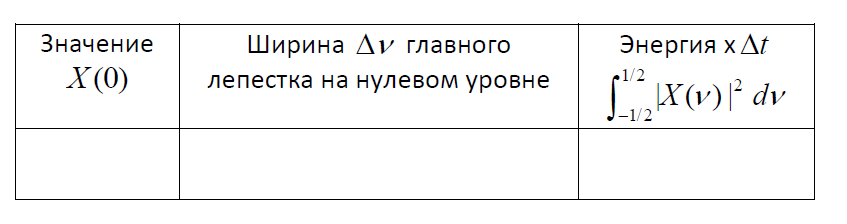

$$X(0)=81$$
$$\Delta\nu=0.222$$
$$\text{Energy}=490$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


x_min =  0.111
min =  0.0005052477713910046
x_max =  0.0
max =  81.0 




(488.99998660637493, 7.055161943475524e-06)

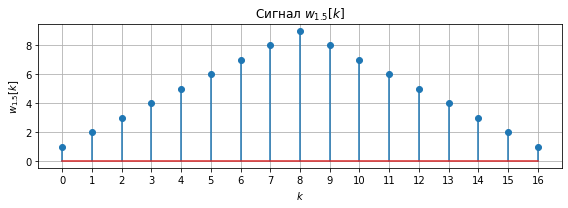

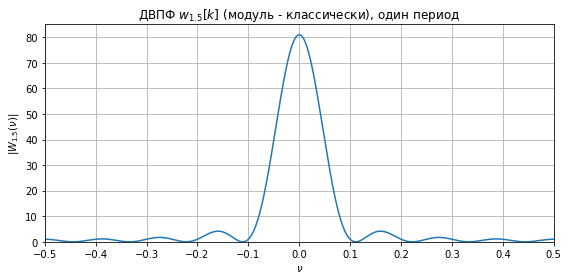

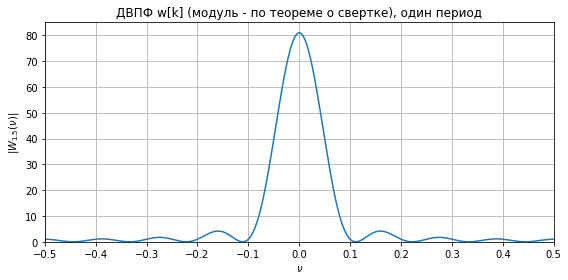

In [ ]:
w5 = np.ones(N)
w5 = signal.convolve(w5, w5)

k5 = np.arange(0, len(w5))
plt.figure(figsize=[8, 3])
plt.stem(k5, w5)
plt.title('Сигнал $w_{1.5}[k]$')
plt.xlabel('$k$')
plt.ylabel('$w_{1.5}[k]$')
plt.grid()
plt.xticks(k5)
plt.tight_layout()

# Модуль ДВПФ
plt.figure(figsize=[8, 4])
nu5, W5 = dtft(w5, M=2048)
plt.plot(nu5, abs(W5))


plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ $w_{1.5}[k]$ (модуль - классически), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W_{1.5}(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

# Модуль ДВПФ
plt.figure(figsize=[8, 4])
plt.plot(nu, abs(W*W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль - по теореме о свертке), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W_{1.5}(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

# для таблицы
def g(nu5):
  return abs(W5[arg_arr(nu5)])

minmax(g, 0, 0.15)

integrate.quad(lambda x: g(x)**2, -0.5, 0.5, limit=10000)

# Занятие 2. Основные свойства ДПФ

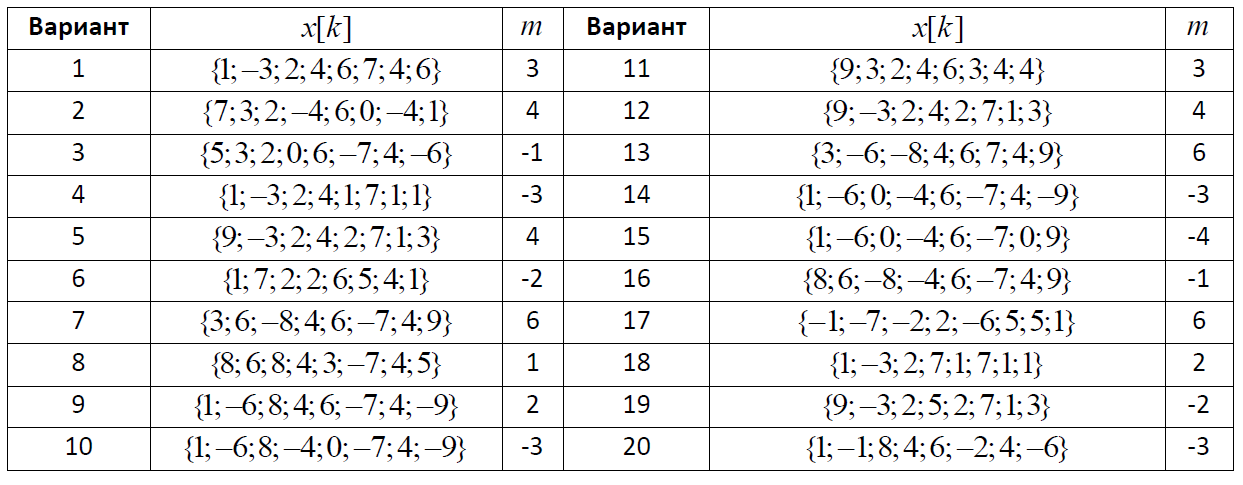

In [ ]:
# initialization
x = np.array([7, 3, 2, -4, 6, 0, -4, 1])
m = 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


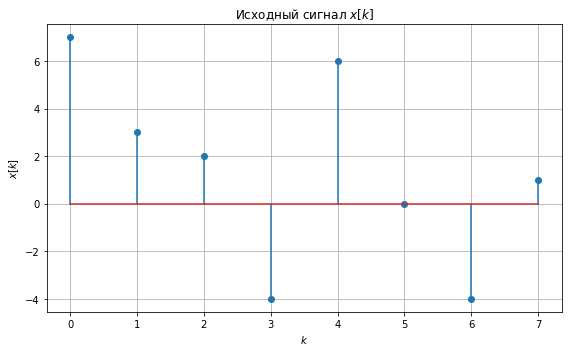

In [ ]:
plt.figure(figsize=[8, 5])

k=np.arange(len(x))
plt.stem(k, x)
plt.xticks(k)
plt.title('Исходный сигнал $x[k]$')
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.grid()
plt.tight_layout()

## Задача 2.1. Алгоритмы вычисления ДПФ. 

Вычислите ДПФ $X[n]$ для последовательности $x[k]$ (в соответствии с Вашим вариантом). Воспользуйтесь следующими способами:

а) вычисление с использованием матричной формы ДПФ;

б) алгоритм быстрого преобразование Фурье (БПФ).

Сравните результаты. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem p

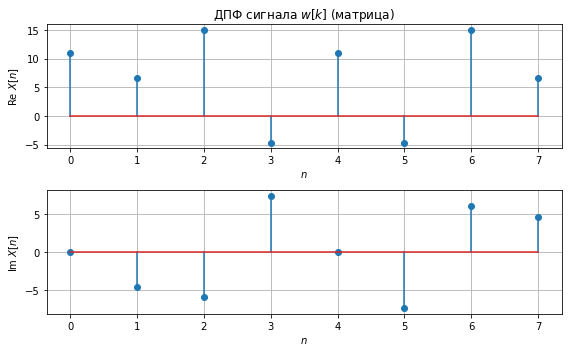

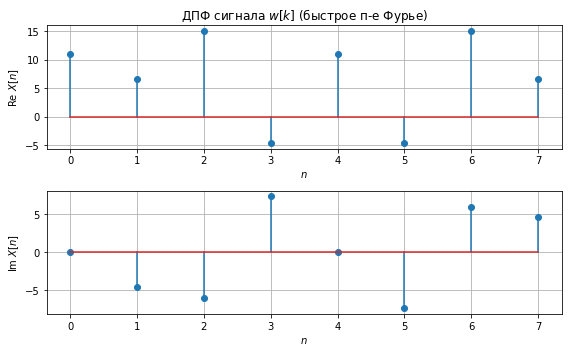

In [ ]:
# Матричная форма ДПФ
W8 = dft(len(x))
Xn = W8 @ x

plt.figure(figsize=[8, 5])

n=np.arange(len(x))
plt.subplot(2, 1, 1)
plt.stem(n, Xn.real)
plt.xticks(n)
plt.title('ДПФ сигнала $w[k]$ (матрица)')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, Xn.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')

plt.grid()
plt.tight_layout()

# Быстрое п-е Фурье ДПФ
Xn_=np.fft.fft(x)

plt.figure(figsize=[8, 5])

plt.subplot(2, 1, 1)
plt.stem(n, Xn_.real)
plt.xticks(n)
plt.title('ДПФ сигнала $w[k]$ (быстрое п-е Фурье)')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, Xn_.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')

plt.grid()
plt.tight_layout()

## Задача 2.2  Свойства симметрии ДПФ. 

Для последовательности $x[k]$ постройте графики $\text{Re}\ X[n]$, $\text{Im}\ X[n]$, $\left| X[n] \right|$, $\angle \ X[n]$.

Сравните получившиеся результаты со свойствами симметрии ДПФ. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this war

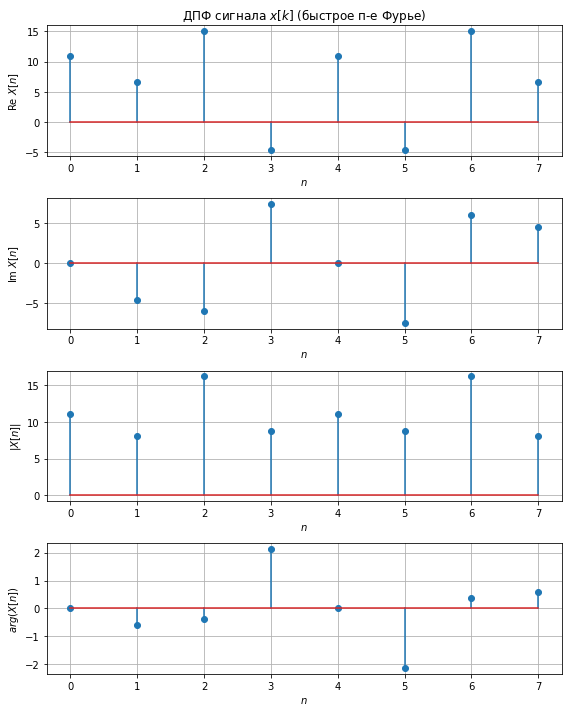

In [ ]:
Xn2=np.fft.fft(x)

plt.figure(figsize=[8, 10])

plt.subplot(4, 1, 1)
plt.stem(n, Xn2.real)
plt.xticks(n)
plt.title('ДПФ сигнала $x[k]$ (быстрое п-е Фурье)')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(4, 1, 2)
plt.stem(n, Xn2.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')
plt.grid()

plt.subplot(4, 1, 3)
plt.stem(n, abs(Xn2))
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('$|X[n]|$')
plt.grid()

plt.subplot(4, 1, 4)
plt.stem(n, np.angle(Xn2))
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('$arg(X[n])$')
plt.grid()

plt.tight_layout()

Относительно $n_0=N/2=4$ наблюдается:


1.   Симметрия $Re(X[n]), |X[n]|$
2.   Антисимметрия $Im(X[n]), \angle X[n]$



## Задача 2.3.  Циклический сдвиг в ДПФ. 


Постройте график для последовательности $x[k]$.
Вычислите последовательность $y[k]$, ДПФ которой 
$Y[n]=\exp \left( -j\frac{2\pi }{8}mn \right)X[n].$

Сравните получившиеся последовательности. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarni

[ 7  3  2 -4  6  0 -4  1]


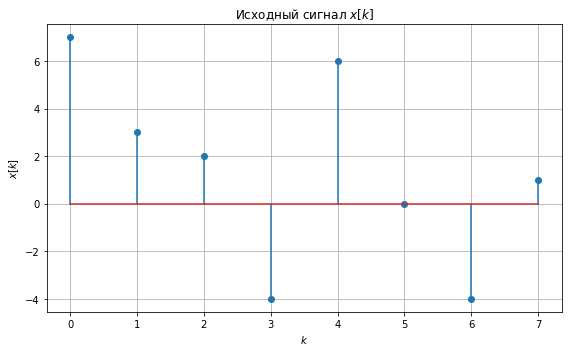

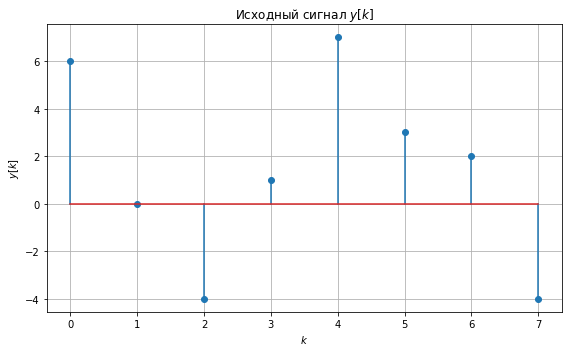

In [ ]:
# Исходная посл x[k]
plt.figure(figsize=[8, 5])

k=np.arange(len(x))
plt.stem(k, x)
plt.xticks(k)
plt.title('Исходный сигнал $x[k]$')
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.grid()
plt.tight_layout()

print(x)

# Вычисление Y[n]
Yn3=np.fft.fft(x)
for n in range(len(Yn3)):
  Yn3[n] = Yn3[n]*np.exp(-1j*2/8.*np.pi*m*n)
y=np.fft.ifft(Yn3)

plt.figure(figsize=[8, 5])

plt.stem(k, y)
plt.xticks(k)
plt.title('Исходный сигнал $y[k]$')
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.grid()
plt.tight_layout()


Исходя из полученных графиков и теориии из фото ниже, получается:

> Сигнал $y[k]$ есть исходный сигнал $x[k]$, циклично сдвинутый на $m=4$ отсчетов вправо (т.к. $m > 0$)

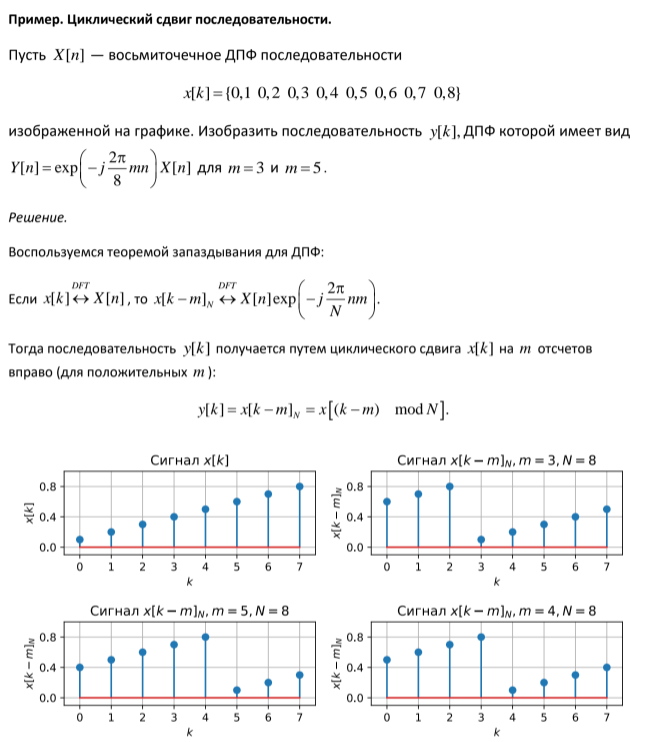

# Занятие 3. Связь ДВПФ и ДПФ

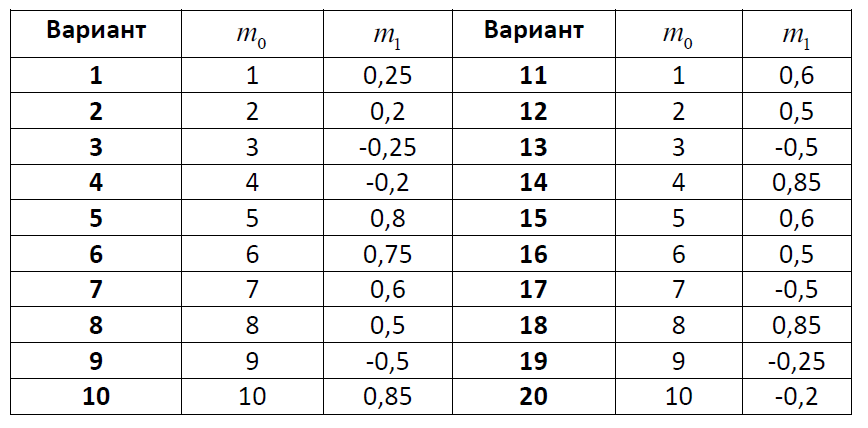

In [ ]:
# initialization
m0 = 2
m1 = 0.2

## Задача 3.1. Интерполяция  ДВПФ добавлением нулевых отсчетов в сигнал.

Постройте на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$ последовательности ($N=32$)
$$x[k]=\left\{ \begin{array}{*{35}{l}}
   \sin \left( \dfrac{2\pi }{N}{{m}_{0}}k \right)+\sin \left( \dfrac{2\pi }{N}\left( {{m}_{0}}+0,25 \right)k \right),\ 0\le k\le N-1;  \\
   0,\ \ \text{при других }k.  \\
\end{array} \right.$$
Увеличьте размерность ДПФ, добавив нулевые отсчеты так, чтобы все относительные частоты синусоид попадали на бины ДПФ.  Приведите на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$  для этого случая. Сравните результаты. 

Частоты синусоид:
$$\nu_1=\frac{m_0}{N}; \qquad \nu_2=\frac{m_0+0.25}{N}$$

Т.к. точки ДПФ ($n$) совпадают с точками ДВПФ ($\nu$) при $\nu=\frac{n}{N}$, то для совпадения частот синусоид с бинами ДПФ нужно подобрать $N_z:$

$$\exists n_0 \in \mathbb{N}: \frac{n_0}{N+N_z}=\nu_2; \quad \nu_1 - \text{выполнено автоматически}$$
$$N_z=N(\frac{n_0}{m_0+0.25}-1)$$

В нашем случае получим:
$$\exists n_0=9: \quad N_z=96$$

Действительно:
$$\frac{n_0}{N+N_z}=\frac{9}{128}=\frac{2.25}{32}=\nu_2$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


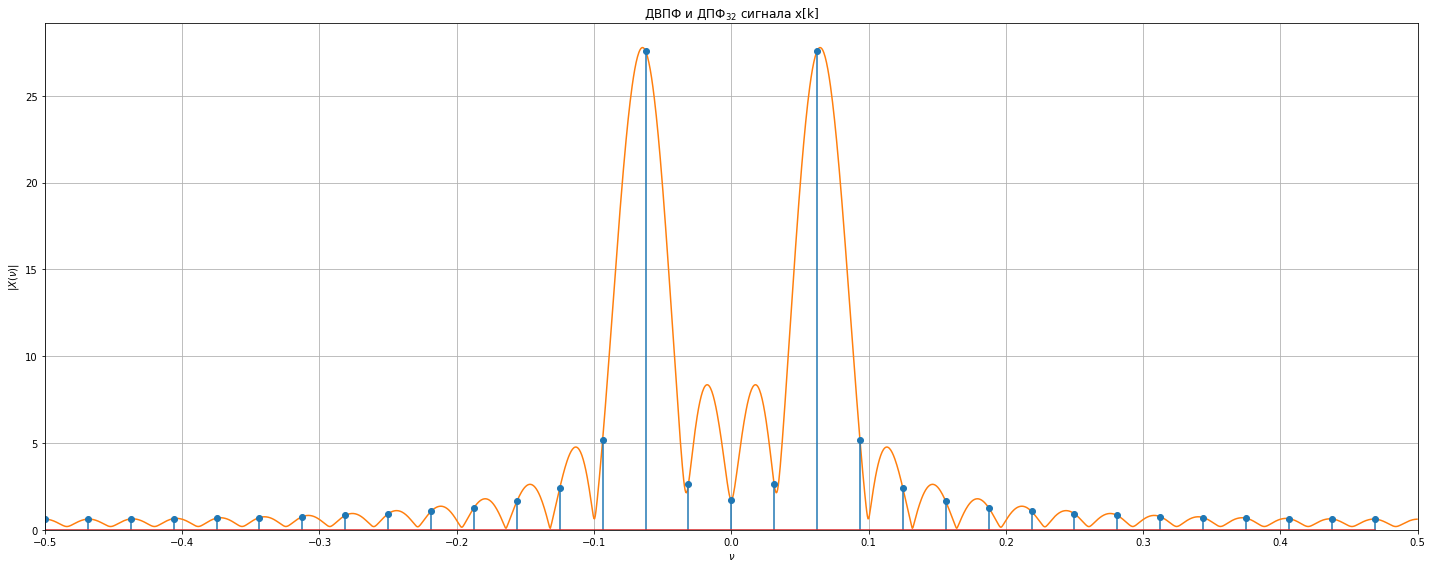

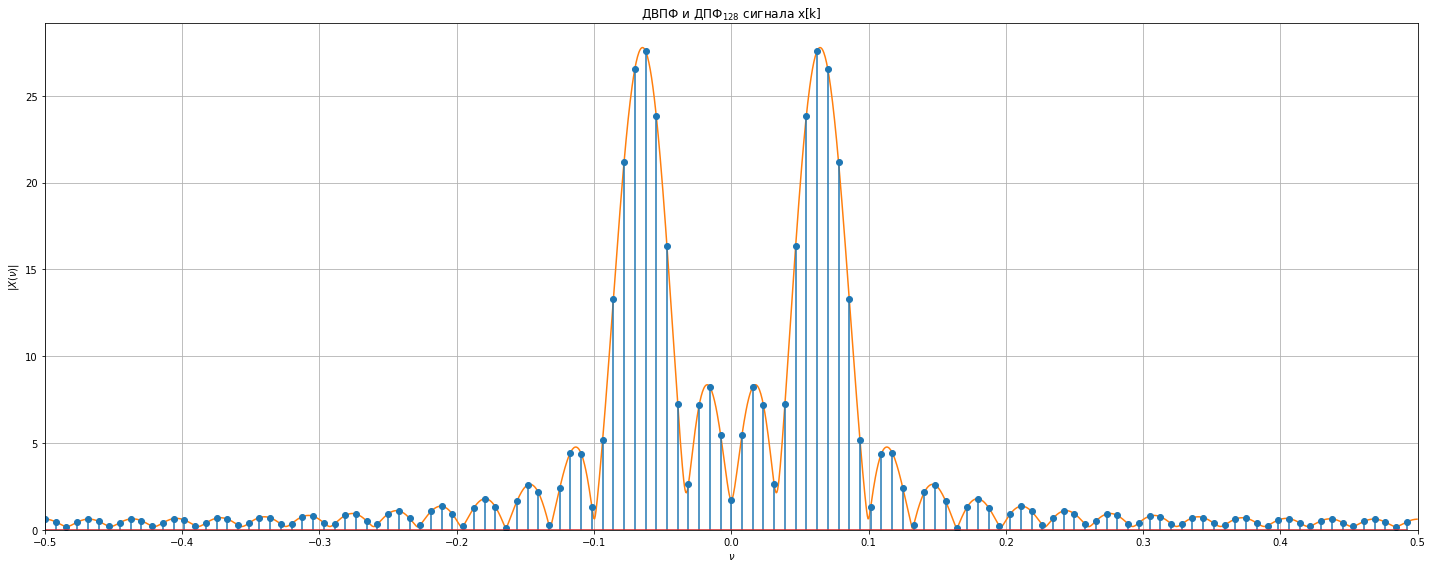

In [ ]:
N=32
k=np.arange(N)
n=np.arange(N)
x=np.sin(2*np.pi*m0*k/N) + np.sin(2*np.pi*(m0+0.25)*k/N)

plt.figure(figsize=[20, 8])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

M=N
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), 'C0', 'C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()



plt.figure(figsize=[20, 8])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

Nz=96
M=N+Nz
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), 'C0', 'C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

## Задача 3.2. ДВПФ и ДПФ периодической последовательсти.

Простройте графики для действительной  и мнимой части коэффициентов ДПФ периодической последовательности $x[k]=\cos \left( \frac{2\pi }{N}mk \right)+\sin \left( \frac{2\pi }{N}mk \right)$  с периодом $N=32$, для случаев $m={{m}_{0}}$ и $m={{m}_{0}}+{{m}_{1}}$. Получите аналитическую запись ДПФ. Сравните ДПФ последовательности с ее ДВПФ. Определите, выполняется ли связь между весами дельта-функций в ДВПФ и величинами отсчетов ДПФ. 

$$Re(x[k])=cos(\frac{2\pi}{N}mk) \rightarrow Re(X(\nu)) = 0.5\sum_{n=-\infty}^{+\infty}\delta(\nu-\frac{m}{N}-n) + \delta(\nu+\frac{m}{N}-n)$$

$$Im(x[k])=sin(\frac{2\pi}{N}mk) \rightarrow Im(X(\nu)) = 0.5\sum_{n=-\infty}^{+\infty}\delta(\nu-\frac{m}{N}-n) - \delta(\nu+\frac{m}{N}-n)$$

> Все согласуется

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


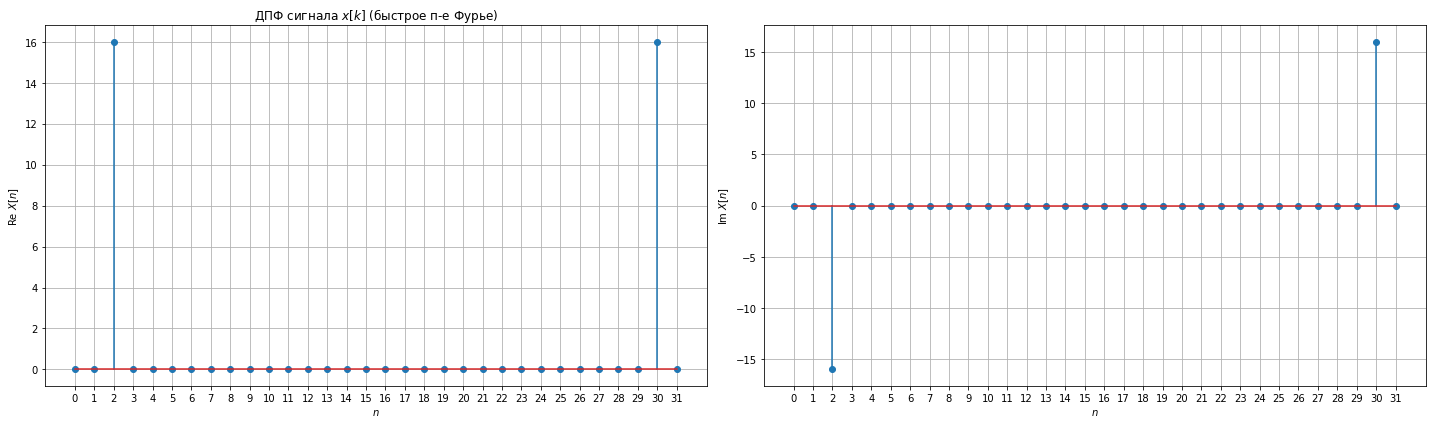

In [ ]:
# случай m=m0 
N=32
m=m0
k=np.arange(N)
n=k
x=np.cos(2*np.pi*m*k/N) + np.sin(2*np.pi*(m)*k/N)

Xn3=np.fft.fft(x)

plt.figure(figsize=[20, 6])

plt.subplot(1, 2, 1)
plt.stem(n, Xn3.real)
plt.xticks(n)
plt.title('ДПФ сигнала $x[k]$ (быстрое п-е Фурье)')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(1, 2, 2)
plt.stem(n, Xn3.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')
plt.grid()

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


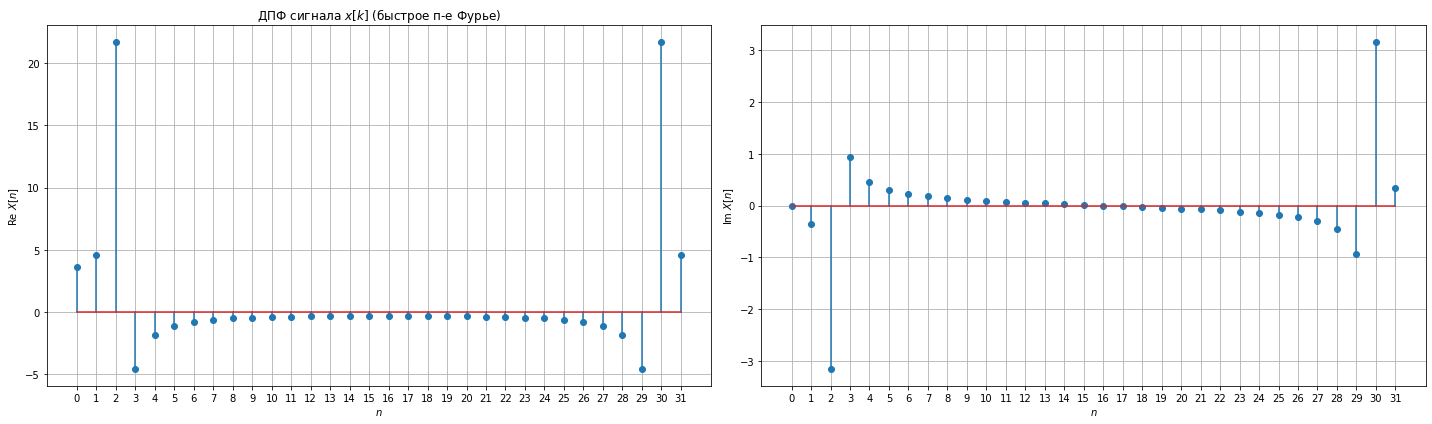

In [ ]:
# случай m=m0+m1 
N=32
m=m0+m1
k=np.arange(N)
n=k
x=np.cos(2*np.pi*m*k/N) + np.sin(2*np.pi*(m)*k/N)

Xn3=np.fft.fft(x)

plt.figure(figsize=[20, 6])

plt.subplot(1, 2, 1)
plt.stem(n, Xn3.real)
plt.xticks(n)
plt.title('ДПФ сигнала $x[k]$ (быстрое п-е Фурье)')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(1, 2, 2)
plt.stem(n, Xn3.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')
plt.grid()

plt.tight_layout()

# Примеры вычислений на Python для лабораторной работы №2 "ДВПФ и ДПФ"

## Задание последовательности отсчетов

Зададим последовательность из 10 единичных импульсов $w[k] = \sum_{m=0}^{N-1} \mathbf{1}[k-m]$

In [ ]:
w = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
w

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Сделаем тоже самое с помощью функции `ones`

In [ ]:
w1=np.ones(10)
w1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Выведем график последовательности $w[k] = \sum_{m=0}^{N-1} \mathbf{1}[k-m]$

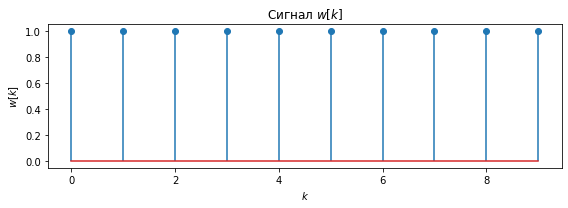

In [ ]:
N=len(w)
k = np.arange(N)
plt.figure(figsize=[8, 3])
plt.stem(k, w)
plt.title('Сигнал $w[k]$')
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.tight_layout()

Определим последовательность вида $y[k]=\exp(j2\pi \nu_0 k) w[k]$

In [ ]:
k = np.arange(N)
nu_0 = 0.25
y=np.exp(1j*2*np.pi*nu_0*k)
y

array([ 1.00000000e+00+0.00000000e+00j,  6.12323400e-17+1.00000000e+00j,
       -1.00000000e+00+1.22464680e-16j, -1.83697020e-16-1.00000000e+00j,
        1.00000000e+00-2.44929360e-16j,  3.06161700e-16+1.00000000e+00j,
       -1.00000000e+00+3.67394040e-16j, -4.28626380e-16-1.00000000e+00j,
        1.00000000e+00-4.89858720e-16j,  5.51091060e-16+1.00000000e+00j,
       -1.00000000e+00+6.12323400e-16j, -2.44991258e-15-1.00000000e+00j,
        1.00000000e+00-7.34788079e-16j, -9.80336420e-16+1.00000000e+00j,
       -1.00000000e+00+8.57252759e-16j, -2.69484194e-15-1.00000000e+00j,
        1.00000000e+00-9.79717439e-16j, -7.35407060e-16+1.00000000e+00j,
       -1.00000000e+00+1.10218212e-15j, -2.93977130e-15-1.00000000e+00j,
        1.00000000e+00-1.22464680e-15j, -4.90477700e-16+1.00000000e+00j,
       -1.00000000e+00+4.89982516e-15j, -3.18470066e-15-1.00000000e+00j,
        1.00000000e+00-1.46957616e-15j, -2.45548340e-16+1.00000000e+00j,
       -1.00000000e+00-1.96067284e-15j, -3.42963002

Определим дискретную линейную свертку (Convolution) последовательности $w[k]$ c точно такой же последовательностью.

In [ ]:
w2=signal.convolve(w, w)
w2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1])

Выведем график для такой последовательности:

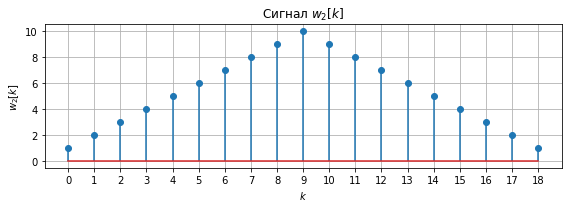

In [ ]:
N=len(w2)
k = np.arange(0, N)
plt.figure(figsize=[8, 3])
plt.stem(k, w2)
plt.title('Сигнал $w_2[k]$')
plt.xlabel('$k$')
plt.ylabel('$w_2[k]$')
plt.grid()
plt.xticks(k)
plt.tight_layout()

Поэлементное умножение задается оператором `*`

In [ ]:
w2*w2

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100,  81,  64,  49,
        36,  25,  16,   9,   4,   1])

## Вычисление ДВПФ

Определим ДВПФ последовательности $w[k]=\sum_{m=0}^{N-1} \mathbf{1}[k-m]$ 

In [ ]:
def dtft(x, M=2048):
    return  np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

In [ ]:
nu, W = dtft(w, M=2048)

* `nu` — массив частот $\nu \in [-0.5;0.5)$ с шагом сетки $\Delta \nu =1/M$,
* `W` — значения ДВПФ $W(\nu )$ в этих точках, 
* `dtft` — функция, 
* `w` — последовательность отсчетов, 
* `M` — число точек на сетки оси частот, в которых вычисляется ДВПФ. 

Построим график для модуля ДВПФ

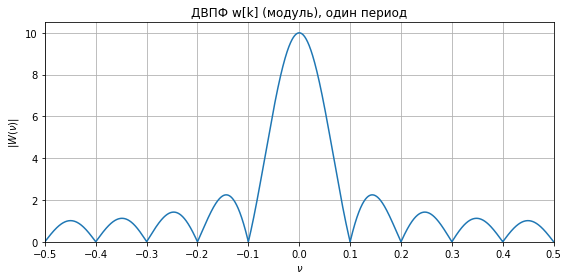

In [ ]:
plt.figure(figsize=[8, 4])
nu, W = dtft(w, M=2048)
plt.plot(nu, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Теперь выведем фазовую часть ДВПФ

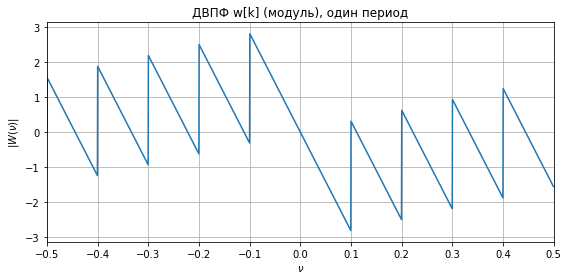

In [ ]:
plt.figure(figsize=[8, 4])
plt.plot(nu, np.angle(W))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

## Вычисление ДПФ

Вычислим ДПФ $N$-точечной последовательности

$$x[k]=\sin \left(2\pi \frac{2}{N}k\right)+\cos \left(2\pi \frac{3}{N}k\right),\;\;k=0,1,\dots ,N-1,\;\;N=8.$$

Формула прямого ДПФ в данном случае без нормирующего множителя $1/N$:
$$X[n]=\sum_{k=0}^{N-1} x[k]\exp \left(-j2\pi \frac{nk}{N}\right)$$
Сначала воспользуемся матричной формой ДПФ. Функция `scipy.linalg.dft(N)` возвращает матрицу ДПФ $[W]_N$ размера $N\times N$. 


In [ ]:
N=8
k=np.arange(N)
x=np.sin(2*np.pi*2/N*k)+np.cos(2*np.pi*3/N*k)
W8 = dft(N)
Xn = W8 @ x
Xn

array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        1.13832009e-16-4.00000000e+00j,  4.00000000e+00+2.22044605e-16j,
        1.33226763e-15+7.88860905e-31j,  4.00000000e+00+4.66293670e-15j,
       -5.01463715e-15+4.00000000e+00j,  0.00000000e+00-2.66453526e-15j])

Построим графики. 

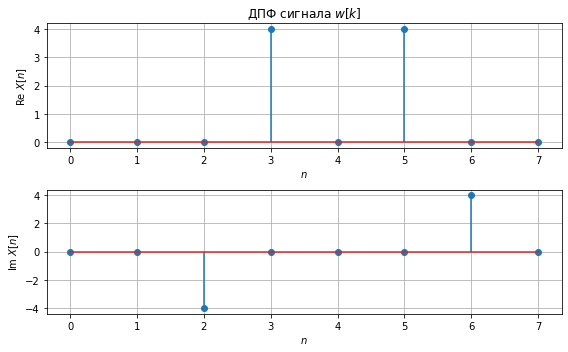

In [ ]:
plt.figure(figsize=[8, 5])

n=np.arange(N)
plt.subplot(2, 1, 1)
plt.stem(n, Xn.real)
plt.xticks(n)
plt.title('ДПФ сигнала $w[k]$')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, Xn.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')

plt.grid()
plt.tight_layout()

Теперь проведем вычисление ДПФ по алгоритму быстрого преобразования Фурье (БПФ). Для этого воспользуемся функцией `np.fft.fft()`.


In [ ]:
Xn1=np.fft.fft(x)
Xn1

array([-3.09256603e-17+0.00000000e+00j,  4.44089210e-16+9.15390196e-17j,
       -1.07929736e-15-4.00000000e+00j,  4.00000000e+00-1.86789586e-15j,
        1.30134197e-15+0.00000000e+00j,  4.00000000e+00+1.86789586e-15j,
       -1.07929736e-15+4.00000000e+00j,  4.44089210e-16-9.15390196e-17j])

Сравним результаты.

In [ ]:
max(abs(Xn1-Xn))

4.034322756779725e-15

## Вычисление обратного ДПФ


Матрица обратного ДПФ может быть найдена как обратная матрица для $[W]_N$.

In [ ]:
W8_inv1 = np.linalg.inv(W8)

Также ее можно получить с помощью транспонирования и комплексного сопряжения (эрмитова сопряжения) c дополнительной нормировкой на $N$, в силу того, что $[W]_N^{-1} =\frac{1}{N}{\left([W]_N^T \right)}^* =\frac{1}{N}[W]_N^*$. 


In [ ]:
W8_inv2 = np.conjugate(W8) / N

Вычислим обратное ДПФ, используя матричную форму. Сравним результат с исходной последовательностью. 


In [ ]:
x1 = W8_inv1 @ Xn
max(abs(x1-x))

7.901860134932568e-16

Выполним те же вычисления с использованием алгоритма БПФ. Для этого нам понадобится функция `np.fft.ifft()`

In [ ]:
x2=np.fft.ifft(Xn)
max(abs(x2-x))

1.4861185472553567e-15

## Интерполяция ДВПФ добавлением нулевых отсчетов

Построим на одном графике модули ДПФ и ДВПФ $N$-точечной последовательности 

$$x[k]=\sin \left(2\pi \frac{6.5}{16}\right),\;\;k=0,1,\dots ,N-1.$$

In [ ]:
N=16
k=np.arange(N)
n=np.arange(N)
x=np.sin(2*np.pi*5.5*k/N)

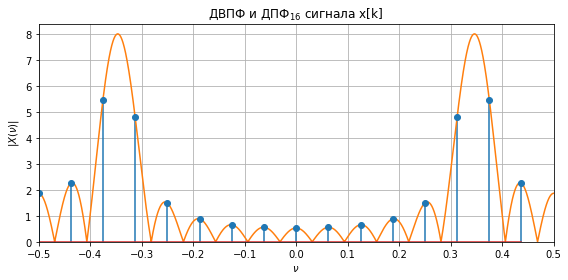

In [ ]:
plt.figure(figsize=[8, 4])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

M=N
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), 'C0', 'C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Здесь функция `np.fft.fftshift` позволяет циклически сдвинуть вычисленные отсчеты ДПФ так, чтобы они соответствовали частотам$\nu_n \in [-0.5;0.5)$, $\nu_n =-0.5+\frac{n}{N}.$

Относительная частота синусойды $\nu_0 =\frac{6.5}{16}$ не попадет на сетку частот ДПФ. В результате спектральные максимумы недостаточно хорошо визуализируются отсчетами ДПФ. Чтобы это улучшить, добавим к последовательности, используемой при вычислении ДПФ, нулевые отсчеты в конец сигнала. Для этого досточно указать второй параметр функции `np.fft.fft(x, M)` равный новому числу отсчетов. 


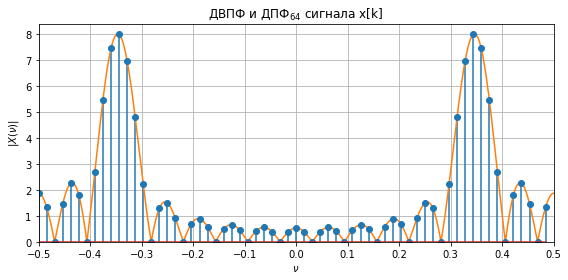

In [ ]:
plt.figure(figsize=[8, 4])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

Nz=48
M=N+Nz
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), 'C0', 'C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()